Dropdown(description='Time Range:', index=2, options=('Last 10 Days', 'Last Month', 'Last 3 Months', 'Last 6 M…


🔥 **Predicted Injury Risk:** 🟠 Medium Risk
💡 **Suggestion:** ⚠️ Reduce training intensity and improve recovery.


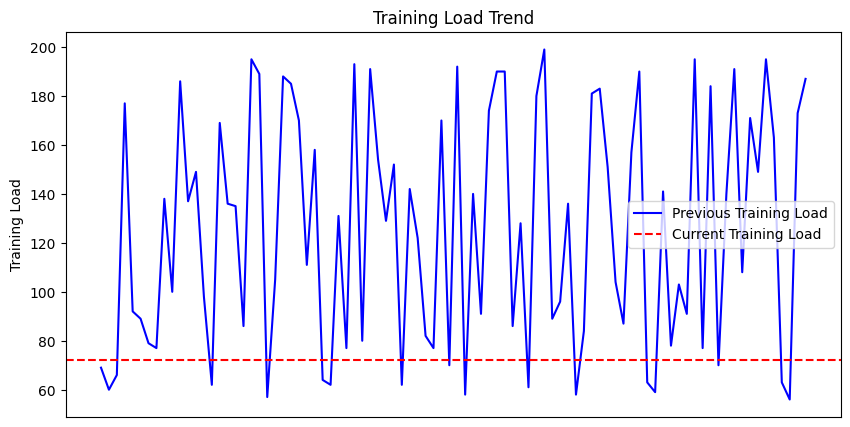

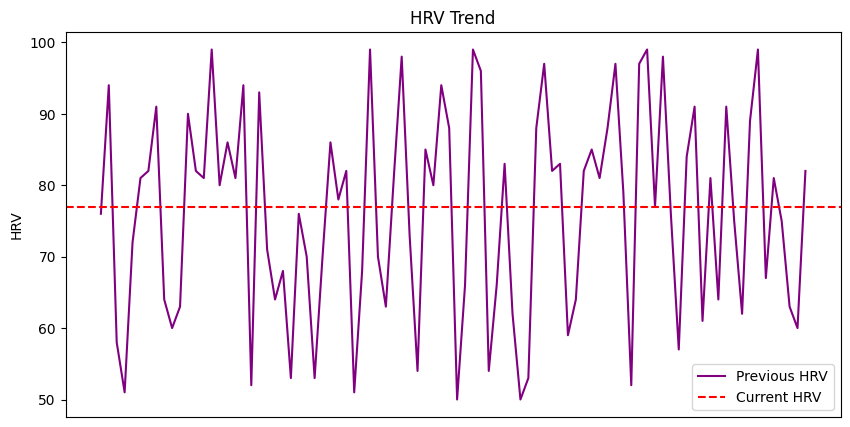

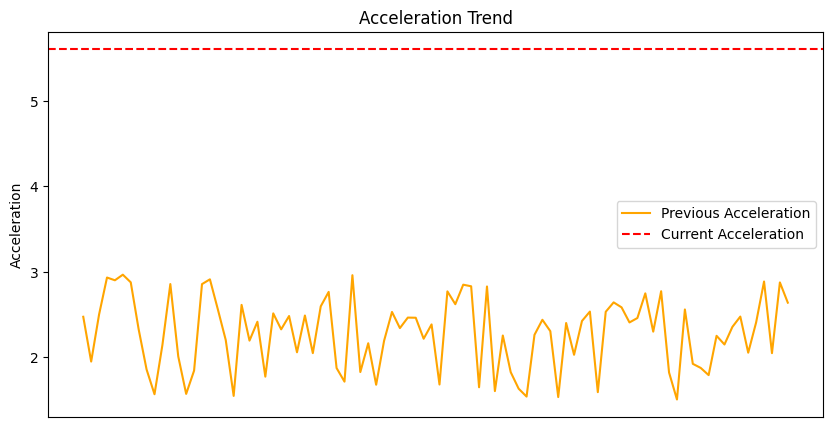

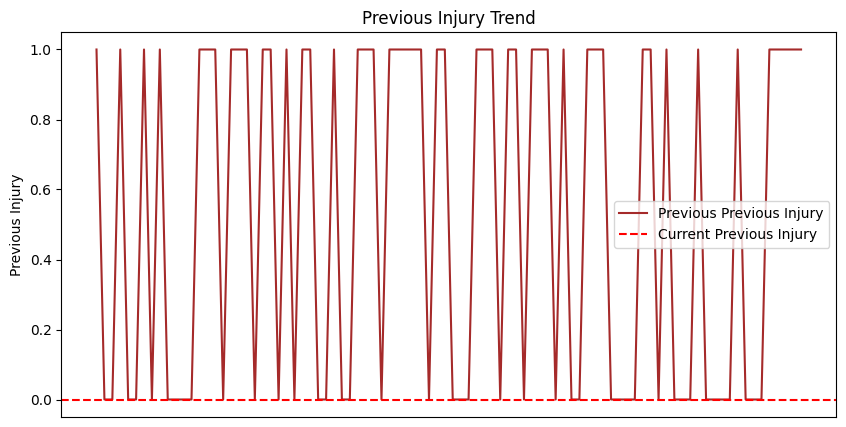

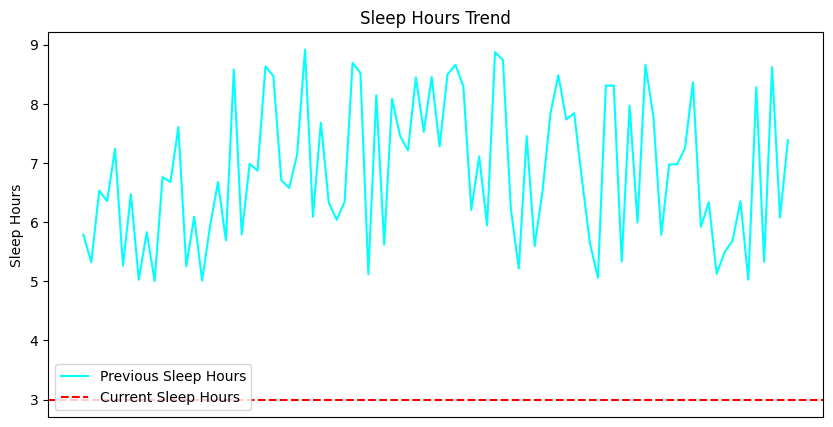

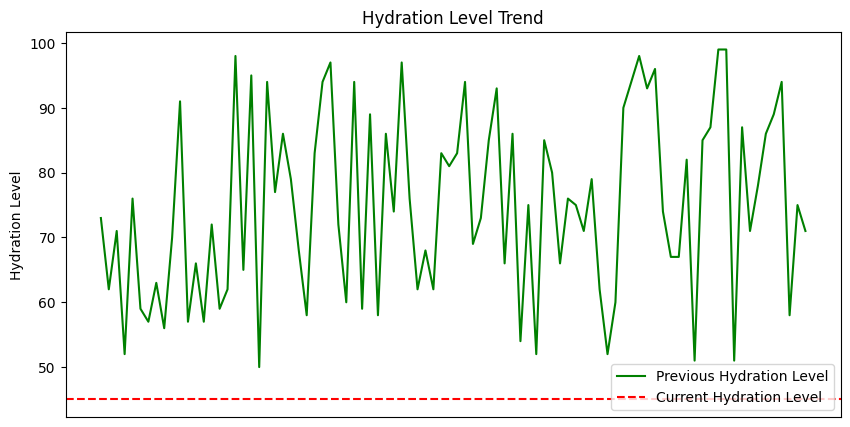

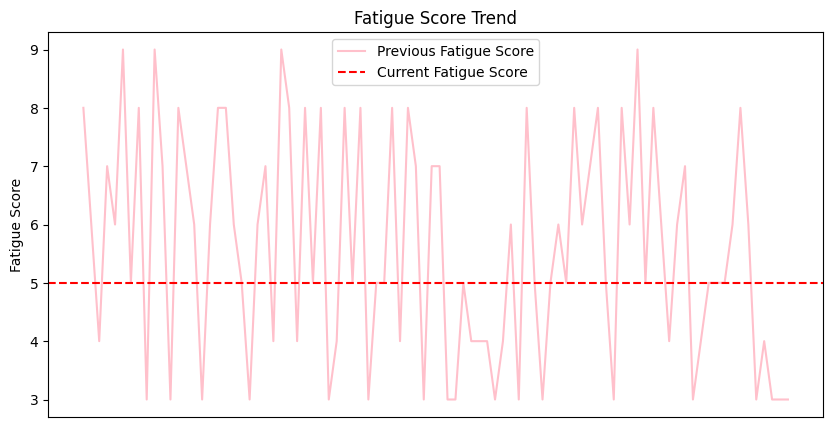

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("/content/SportAI Risk Data.csv")

# Convert categorical to numeric
df["Previous Injury"] = df["Previous Injury"].astype(int)
df["Injury Risk"] = df["Injury Risk"].astype(int)

# User Input
print("Enter your details for injury risk prediction:")
training_load = int(input("Training Load: "))
hrv = int(input("HRV (ms): "))
acceleration = float(input("Acceleration (m/s²): "))
previous_injury = int(input("Previous Injury (1 for Yes, 0 for No): "))
sleep_hours = float(input("Sleep Hours: "))
hydration_level = int(input("Hydration Level (%): "))
fatigue_score = int(input("Fatigue Score (1-10): "))

# Simulating Loading
print("Processing your data...")
time.sleep(3)

# Prepare Data for Model
X = df.drop(columns=["Date", "Injury Risk"])
y = df["Injury Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict Injury Risk
user_data = np.array([[training_load, hrv, acceleration, previous_injury, sleep_hours, hydration_level, fatigue_score]])
prediction = rf.predict(user_data)[0]

# Injury Risk Display
risk_labels = {
    0: ("🟢 Low Risk", "✅ Continue training, but maintain balance."),
    1: ("🟠 Medium Risk", "⚠️ Reduce training intensity and improve recovery."),
    2: ("🔴 High Risk", "❗ High alert! Reduce training, hydrate well, and get proper rest.")
}

risk_message, suggestion = risk_labels[prediction]

# Display Prediction
print("\n🔥 **Predicted Injury Risk:**", risk_message)
print("💡 **Suggestion:**", suggestion)

# Personalized Recommendations
if hydration_level < 50:
    print("💧 Try increasing your hydration level to at least 50% for better recovery.")
if sleep_hours < 7:
    print("😴 Try getting at least 7 hours of sleep to reduce fatigue.")
if fatigue_score > 7:
    print("⚡ Your fatigue score is high! Reduce training intensity for better recovery.")
if training_load > 150:
    print("🏋️‍♂️ Consider reducing your training load to avoid overexertion.")

# Dropdown for Time Range Selection
time_range = widgets.Dropdown(
    options=['Last 10 Days', 'Last Month', 'Last 3 Months', 'Last 6 Months', 'Last Year'],
    value='Last Month',
    description='Time Range:',
    disabled=False,
)

display(time_range)

# Function to Filter Data Based on Selected Time Range
def filter_data(range_option):
    if range_option == 'Last 10 Days':
        return df.tail(10)
    elif range_option == 'Last Month':
        return df.tail(30)
    elif range_option == 'Last 3 Months':
        return df.tail(90)
    elif range_option == 'Last 6 Months':
        return df.tail(180)
    else:
        return df

# Function to Plot Feature Trends
def plot_feature_trend(feature, current_value, label, color):
    filtered_df = filter_data(time_range.value)
    plt.figure(figsize=(10, 5))
    sns.lineplot(y=filtered_df[feature], x=range(len(filtered_df)), label=f'Previous {label}', color=color)
    plt.axhline(current_value, color='red', linestyle='dashed', label=f'Current {label}')
    plt.legend()
    plt.title(f"{label} Trend")
    plt.xticks([])  # Remove x-axis labels
    plt.show()

# Display Initial Graphs
def show_initial_graphs():
    plot_feature_trend('Training Load', training_load, 'Training Load', 'blue')
    plot_feature_trend('HRV', hrv, 'HRV', 'purple')
    plot_feature_trend('Acceleration', acceleration, 'Acceleration', 'orange')
    plot_feature_trend('Previous Injury', previous_injury, 'Previous Injury', 'brown')
    plot_feature_trend('Sleep Hours', sleep_hours, 'Sleep Hours', 'cyan')
    plot_feature_trend('Hydration Level', hydration_level, 'Hydration Level', 'green')
    plot_feature_trend('Fatigue Score', fatigue_score, 'Fatigue Score', 'pink')

show_initial_graphs()

# Dynamic Graph Update
def update_graphs(change):
    clear_output(wait=True)
    display(time_range)
    print("\n🔥 **Predicted Injury Risk:**", risk_message)
    print("💡 **Suggestion:**", suggestion)
    show_initial_graphs()

# Attach Graph Update to Dropdown Change
time_range.observe(update_graphs, names='value')
